# Projeto Ciência de Dados - Previsão de Preços

- Nosso desafio é conseguir prever o preço de barcos que vamos vender baseado nas características do barco, como: ano, tamanho, tipo de barco, se é novo ou usado, qual material usado, etc.

- Base de Dados: https://drive.google.com/drive/folders/1o2lpxoi9heyQV1hIlsHXWSfDkBPtze-V?usp=share_link

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

![title](tabelas.png)

In [39]:
#Passo 1: Entendimento do Desafio
#Passo 2: Entendimento da Área/Empresa
    # prever o preço de barcos baseado nas características dele: ano, tamanho, tipo de barco, se é novo ou usado, etc.
#Passo 3: Extração/Obtenção de Dados
import pandas as pd

tabela = pd.read_csv("barcos_ref.csv")
display(tabela)

# Todas as informações tem que ser numéricas para a previsão dar certo

,Preco,TipoBarco,TipoVenda,Ano,Comprimento,Largura,Material
0,3490,1,1,2020,4.00,1.50,1
1,3399,2,1,2019,3.55,1.46,2
2,3600,3,2,1999,6.20,2.38,2
3,3500,2,2,1987,4.35,1.75,3
4,3500,4,2,2004,4.70,2.00,3
...,...,...,...,...,...,...,...
7644,5000,7,2,1974,7.20,2.70,3
7645,4999,4,2,1980,6.00,2.10,3
7646,4950,2,2,1984,6.00,1.62,5
7647,4499,4,1,2020,4.40,1.80,3


In [40]:
#Passo 4: Ajuste de Dados (Tratamento/Limpeza)
print(tabela.info())

# Analisando o print, não será necessário fazer nenhum ajuste nessa base de dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7649 entries, 0 to 7648
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Preco        7649 non-null   int64  
 1   TipoBarco    7649 non-null   int64  
 2   TipoVenda    7649 non-null   int64  
 3   Ano          7649 non-null   int64  
 4   Comprimento  7649 non-null   float64
 5   Largura      7649 non-null   float64
 6   Material     7649 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 418.4 KB
None


,Preco,TipoBarco,TipoVenda,Ano,Comprimento,Largura,Material
Preco,1.000000,0.293137,0.041266,0.113385,0.578353,0.557621,-0.036476
TipoBarco,0.293137,1.000000,0.142893,-0.130147,0.541307,0.567662,0.083989
TipoVenda,0.041266,0.142893,1.000000,-0.195147,0.148886,0.163431,0.054972
Ano,0.113385,-0.130147,-0.195147,1.000000,-0.211120,-0.105949,-0.440310
Comprimento,0.578353,0.541307,0.148886,-0.211120,1.000000,0.874952,0.123300
Largura,0.557621,0.567662,0.163431,-0.105949,0.874952,1.000000,0.084715
Material,-0.036476,0.083989,0.054972,-0.440310,0.123300,0.084715,1.000000


,Preco
Preco,1.000000
TipoBarco,0.293137
TipoVenda,0.041266
Ano,0.113385
Comprimento,0.578353
Largura,0.557621
Material,-0.036476


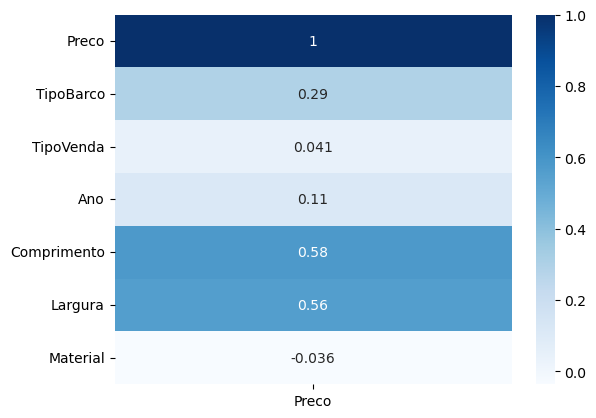

In [41]:
#Passo 5: Análise Exploratória
    # Vamos analisar as correlações em variáveis em relação a variável preço
    # Quanto mais próximo de 1 melhor
display(tabela.corr())

# Pode isolar só a primeira coluna para análise, já que so é observado as variáveis e relação ao preço
    # Para ter uma visualização melhor coloca 2 colchetes
correlacao = tabela.corr()[["Preco"]]
display(correlacao)

# Pode analisar também observando gráfico
# vamos usar outras bibliotecas para gráficos para uma melhor aprendizagem
import seaborn as sns
import matplotlib.pyplot as plt

    # criar gráfico - nesse caso gráfico de calor, pode escolher outros
sns.heatmap(correlacao, cmap = "Blues", annot = True)
    
    # exibir gráfico
plt.show()

# se tiver valores acima de 0.7 pode ser que a IA entenda como sendo o mesmo resultado e dê problema
# prestar atenção nisso - talve tendo que jogar a coluna fora

In [42]:
#Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
    # Normalmente quem vai prever é y e as outras características chama de x
y = tabela["Preco"]

x = tabela.drop("Preco", axis = 1)

# Dividir a base de dados em treino e teste - para checar se a IA vai aprender a prever 
    # train test split
from sklearn.model_selection import train_test_split

    # pode decidir o quanto % vai para o teste com teste_size - nesse caso foi usado 30%
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.3)


In [43]:
# Passos para criar a Ia 

    # Importar a IA
        # vamor usar dois modelos - pode ser de regressão linear, árvore de decisão, rede neural e assim vai
        # vamos usar os modelos de  regressão linear e árvore de decisão - criando duas IAs para comparar qual é melhor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
        
    # Criar a IA 
modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()
    
    # Treinar a IA
modelo_regressaolinear.fit(x_treino, y_treino)
modelo_arvoredecisao.fit(x_treino, y_treino)

# normalmente criam mais modelos para fazer as comparações - uns 15

RandomForestRegressor()

In [44]:
#Passo 7: Interpretação de Resultados

    # Escolher o melhor modelo - com o R² (percentual de precisão)
from sklearn.metrics import r2_score
    # calcular a previsão dos modelos
previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste)
    # comparando os dois resultados com y_teste
print("Modelo de regressão linear: ", r2_score(y_teste, previsao_regressaolinear))
print("Modelo de árvore de decisão: ",r2_score(y_teste, previsao_arvoredecisao))

# quanto mais próximo de 1 melhor é a precisão
# nesse caso a arvore de decisão obteve um resultado melhor


Modelo de regressão linear:  0.3998249795141299
Modelo de árvore de decisão:  0.8495251493009482


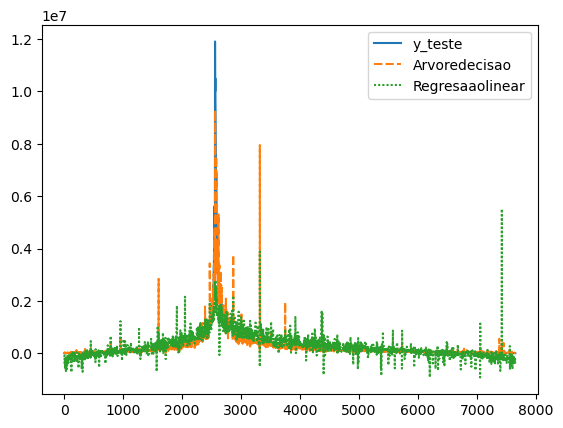

In [45]:
    # Visualizar as previsões - não precisa fazer, só pra ver as previsões de uma pra outra
    # cria uma tabela vazia e vai adicionar 3 colunas nela (para este caso específico)
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar["y_teste"] = y_teste
tabela_auxiliar["Arvoredecisao"] = previsao_arvoredecisao
tabela_auxiliar["Regresaaolinear"] = previsao_regressaolinear
    # criando gráfico de linha
sns.lineplot(data = tabela_auxiliar)
plt.show()


In [47]:
    # Fazer novas previsões (usando a IA na prática)
    # para isso precisa ter as informações dos novos barcos para poder prever, só que sem a info de preço
tabela_nova = pd.read_csv("novos_barcos.csv")
display(tabela_nova)

previsao = modelo_arvoredecisao.predict(tabela_nova)
print(previsao)

,TipoBarco,TipoVenda,Ano,Comprimento,Largura,Material
0,2,3,2023,3.0,1.5,1
1,2,1,2023,3.8,1.9,2
2,3,2,1999,6.2,3.0,2


[ 6622.37 10829.33 14156.5 ]
